In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import sys
sys.path.append(r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\Scripts')
from correlation import Correlation

In [3]:
file_paths = {
    'df': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\raw_analyst_ratings\raw_analyst_ratings.csv',
    'AAPL': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\AAPL_historical_data.csv',
    'AMZN': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\AMZN_historical_data.csv'
}

In [4]:
co = Correlation(file_paths)

In [5]:
df_AAPL = co.read_csv_with_date(filepath=file_paths['AAPL'], date_col='Date')

In [6]:
co.check_nulls_and_info(df_AAPL, 'AAPL Data')

Total null values in AAPL Data: 0

AAPL Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB
None




In [7]:
df_AAPL = co.convert_to_datetime(df_AAPL, date_col='Date')
df_AAPL.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00+00:00,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15 00:00:00+00:00,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16 00:00:00+00:00,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0


In [8]:
df_AAPL = co.format_date_column(df_AAPL, date_col='Date')
df_AAPL.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0


In [9]:
df_raw = co.read_csv_with_date(filepath=file_paths['df'], date_col='date')
df_raw.sample(3)

,Unnamed: 0,headline,url,publisher,date,stock
367684,369714,Citigroup Says Dollar General Is A Buy; Are Th...,https://www.benzinga.com/analyst-ratings/analy...,Javier Hasse,2014-12-10 00:00:00,DLTR
325078,326865,Time To Do Some Shopping With China ETFs?,https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2011-03-09 00:00:00,CYB
1305195,1311491,Stifel Nicolaus Downgrades Vical Incorporated ...,https://www.benzinga.com/news/13/08/3831876/st...,Paul Quintaro,2013-08-12 00:00:00,VICL


In [10]:
sentiment_data = co.analyze_sentiment(df_raw)

In [11]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], format='mixed', utc=True)
sentiment_data['date'] = sentiment_data['date'].dt.strftime('%Y-%m-%d')
sentiment_data.set_index('date', inplace=True)
sentiment_data.sample(3)

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_category
date,,,,,,,
2017-06-28,1172790,Hearing Staples Could Be Purchased By Sycamore...,https://www.benzinga.com/news/17/06/9666618/he...,Paul Quintaro,SPLS,0.0,Neutral
2011-04-19,1282770,"Wedbush Maintains Rating, PT On TZOO In Q1 Pre...",https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffT,TZOO,0.0,Neutral
2010-12-31,663437,7 Penny Tech Stocks to Buy,https://www.benzinga.com/10/12/742557/7-penny-...,webmaster,IMOS,0.0,Neutral


In [12]:
df_AAPL.rename(columns={"Date": "date"}, inplace=True)

In [13]:
df_AAPL.set_index('date', inplace=True)

In [14]:
df_AAPL.sample(5)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
1989-06-21,0.383929,0.388393,0.377232,0.379464,0.297960,129864000,0.0,0.0
2016-01-15,24.049999,24.427500,23.840000,24.282499,22.023046,319335600,0.0,0.0
2017-05-01,36.275002,36.799999,36.240002,36.645000,34.121994,134411600,0.0,0.0
2013-09-23,17.717857,17.746786,17.235714,17.522858,15.215236,762106800,0.0,0.0
2005-06-03,1.362857,1.377857,1.348929,1.365714,1.153312,956869200,0.0,0.0


In [15]:
df_AAPL = co.calculate_daily_returns(df_AAPL)

In [16]:
aligned_data = co.merge_dataframes(df_AAPL, sentiment_data)

In [17]:
aligned_data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily Returns,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_category
date,,,,,,,,,,,,,,,,
2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.006699,522587,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,0.0,Neutral
2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,0.006699,1396488,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,0.0,Neutral
2009-04-29,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,0.010008,1834,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,0.0,Neutral
2009-05-22,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,-0.013529,68387,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,0.0,Neutral


In [23]:
daily_sentiment = co.aggregate_daily_sentiment(aligned_data)
daily_sentiment.head(9)

,date,average_sentiment
0,2009-04-27,0.0
1,2009-04-29,0.0
2,2009-05-22,0.0


c:\Users\ephre\Documents\Financial News and Stock Price Integration\.venv2\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ephre\Documents\Financial News and Stock Price Integration\.venv2\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between sentiment and daily stock returns: nan


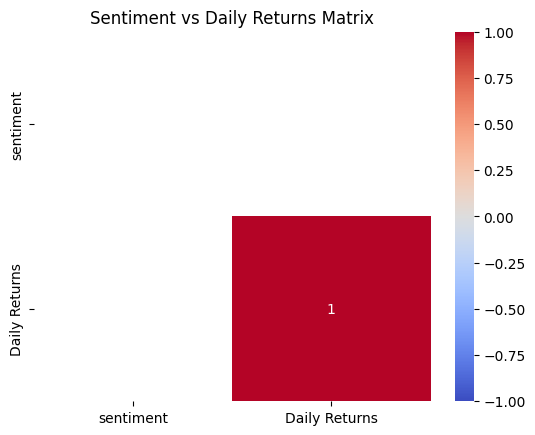

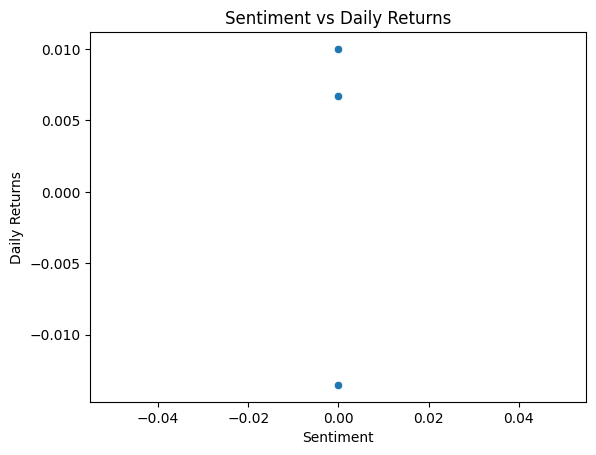

In [26]:
co.analyze_correlation_and_plot(aligned_data)